In [23]:
from typing import List, Tuple, Callable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ds1.csv')
df

,Altura (m),Peso (Kg),Comprimento (cm)
0,1.087,18.141,37
1,1.613,42.404,50
2,0.953,16.100,34
3,1.003,13.605,36
4,1.156,23.583,43
5,0.978,7.710,28
6,1.092,17.460,37
7,0.572,3.855,20
8,0.940,14.966,34
9,0.597,4.308,30


In [32]:
def regressao_linear_gd(X: np.ndarray, y: np.ndarray, alpha: float=0.01, epochs: int=1000) -> Tuple[np.ndarray, List[float]]:
    """
    Implementação da regressão linear pelo método do gradiente descendente.
    :param X: matriz de atributos de entrada.
    :param y: vetor de resultados.
    :param alpha: taxa de aprendizado do modelo.
    :param epochs: total de épocas.
    :return: vetor de pesos e lista do EQM ao longo das épocas.
    """
    n: int = len(y)  # Número de entradas.
    eqms: List[float] = []  # Erros quadráticos médios.
    # Adiciona uma coluna de uns em X.
    X = np.hstack((np.ones((n, 1)), X))
    # Inicialização dos pesos.
    w: np.ndarray = np.zeros(X.shape[1])
    for _ in range(epochs):
        y_pred: np.ndarray = X @ w  # Cálculo de y predito.
        e: np.ndarray = y - y_pred  # Cálculo do erro.
        # Cálculo do erro quadrático médio.
        eqm: float = np.mean(e**2) 
        eqms.append(eqm)
        # Atualização dos parâmetros.
        w = w + (alpha/n) * (X.T @ e)
    return w, eqms

In [33]:
X = np.array(df[['Altura (m)', 'Peso (Kg)']])
y = np.array(df['Comprimento (cm)'])
# Normalização de X.
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [34]:
w, erros = regressao_linear_gd(X, y)

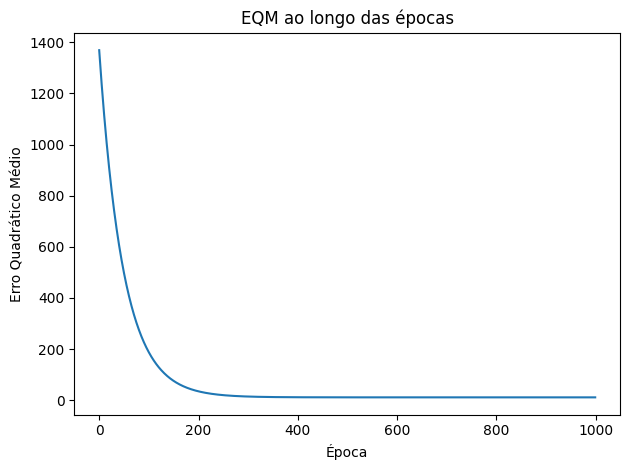

In [35]:
plt.plot(erros)
plt.title('EQM ao longo das épocas')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio')
plt.tight_layout()
plt.show()

In [28]:
def regressao_linear_gde(X: np.ndarray, y: np.ndarray, alpha: float=0.003, epochs: int=1000) -> Tuple[np.ndarray, List[float]]:
    """
    Implementação da regressão linear pelo método do gradiente descendente estocástico.
    :param X: matriz de atributos de entrada.
    :param y: vetor de resultados.
    :param alpha: taxa de aprendizado do modelo.
    :param epochs: total de épocas.
    :return: vetor de pesos e lista do EQM ao longo das épocas.
    """
    n: int = len(y)  # Número de entradas.
    eqms: List[float] = []  # Erros quadráticos médios.
    # Adiciona uma coluna de uns em X.
    X = np.hstack((np.ones((n, 1)), X))
    # Inicialização dos pesos.
    w: np.ndarray = np.zeros(X.shape[1])
    for epoch in range(epochs):
        idx = np.random.permutation(n)
        # Embaralhamento de X e y.
        X = X[idx]
        y = y[idx]
        for xi, yi in zip(X, y):
            y_i_pred: np.ndarray = xi @ w  # Cálculo de yi predito.
            e_i: np.ndarray = yi - y_i_pred  # Cálculo do erro.
            # Atualização dos parâmetros.
            w += alpha * xi * e_i
        # Calculo dos erros totais
        y_pred: np.ndarray = X @ w  # Cálculo de y predito.
        e: np.ndarray = y - y_pred  # Cálculo do erro.
        # Cálculo do erro quadrático médio.
        eqm: float = np.mean(e**2) 
        eqms.append(eqm)
    return w, eqms

In [29]:
w, erros = regressao_linear_gde(X, y)

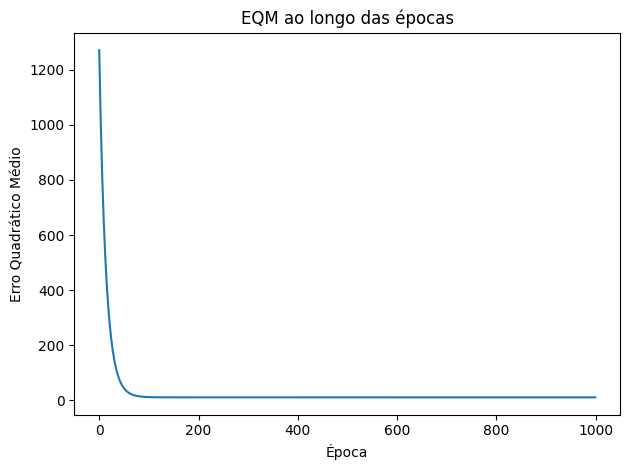

In [30]:
plt.plot(erros)
plt.title('EQM ao longo das épocas')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio')
plt.tight_layout()
plt.show()

In [24]:
def regressao_linear_ols(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Implementação da regressão linear pelo método dos mínimos quadrados ordinários (OLS).
    :param X: Matriz de atributos de entrada.
    :param y: Vetor de resultados.
    :return: Vetor de pesos.
    """
    # Está sendo utilizada a pseudoinversa para contornar casos onde (X^t X) não é invertível.
    pseudoinversa: Callable = np.linalg.pinv
    n: int = len(y)  # Número de entradas.
    # Adiciona uma coluna de uns em X.
    X = np.hstack((np.ones((n, 1)), X))
    # Cálculo dos pesos.
    w: np.ndarray = pseudoinversa(X.T @ X) @ X.T @ y
    return w

In [26]:
w = regressao_linear_ols(X, y)